In [2]:
import numpy as np
import imgaug.augmenters as iaa
import os
from matplotlib import pyplot as plt
from PIL import Image
import scipy.misc
import tensorflow as tf
%config IPCompleter.greedy=True

In [5]:

model_list = [
    tf.keras.models.load_model(os.path.join('training','0')),
    tf.keras.models.load_model(os.path.join('training','1')),
    tf.keras.models.load_model(os.path.join('training','2')),
    tf.keras.models.load_model(os.path.join('training','3')),
]

In [6]:
test_data = [
    Image.open('100_1.jpg'),
    Image.open('100_2.jpg'),
    Image.open('100_3.jpg'),
    Image.open('1000_1.jpg'),
    Image.open('1000_2.jpg'),
    Image.open('1000_3.jpg'),
    Image.open('200_1.jpg'),
 #   Image.open('200_2.jpg'),
 #   Image.open('2000_1.jpg'),
    Image.open('5d_1.jpg'),
    Image.open('100d_1.jpg'),
    Image.open('100y_1.jpg'),
    Image.open('100y_2.jpg'),
]
for i in range(len(test_data)):
    img = test_data[i]
    img = img.resize((256,128),resample=Image.BOX)
    img = np.array(img)
    test_data[i]=img
    
test_data = np.array(test_data)

In [7]:
test_data = iaa.Grayscale(alpha=1.0).augment_images(test_data)
test_data = test_data.astype(np.float32)
test_data /= 255

In [10]:
result = []
for i in range(4):
    print(i)
    result.append(model_list[i].predict(test_data))
values = ['Euro/50', 'Euro/10', 'Euro/100', 'Euro/5', 'Euro/200', 'Euro/20', 'Euro/500', 'USA/1', 'USA/2', 'USA/50', 'USA/10', 'USA/100', 'USA/5', 'USA/20', 'Kazah/1000', 'Kazah/10000', 'Kazah/2000', 'Kazah/200', 'Kazah/5000', 'Kazah/500', 'rubles/1000', 'rubles/2000', 'rubles/100', 'rubles/200', 'rubles/5000', 'rubles/500', 'China/1', 'China/50', 'China/10', 'China/100', 'China/5', 'China/20']


0
1
2
3


rubles/100 0.9997220635414124
rubles/500 0.0488877147436142
rubles/100 0.9999998807907104
rubles/100 0.9495027661323547


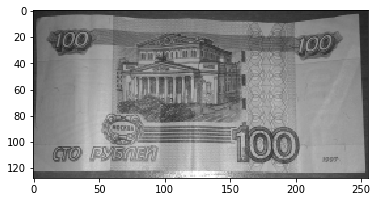

rubles/100 0.9993065595626831
rubles/500 0.0488877147436142
rubles/100 0.9720636606216431
rubles/100 0.8823036551475525


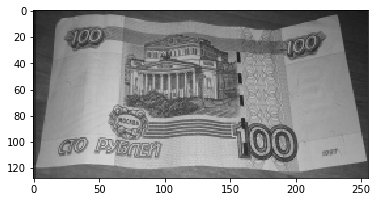

rubles/100 0.9455083608627319
rubles/500 0.0488877147436142
Euro/10 0.9999300241470337
rubles/500 0.9392649531364441


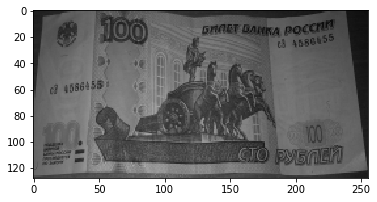

rubles/1000 0.9997319579124451
rubles/500 0.0488877147436142
Kazah/2000 0.8223206400871277
rubles/1000 0.7316350340843201


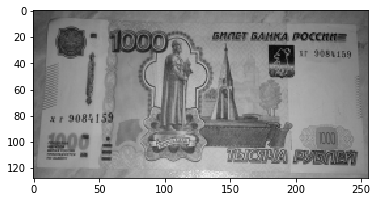

rubles/1000 0.997277557849884
rubles/500 0.0488877147436142
China/5 0.9998853206634521
rubles/1000 0.9713428020477295


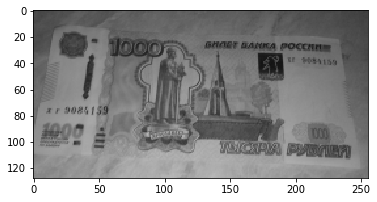

rubles/1000 0.9986006617546082
rubles/500 0.0488877147436142
rubles/500 0.9886388778686523
rubles/500 0.5630127191543579


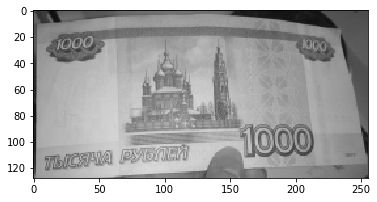

rubles/200 0.9999614953994751
rubles/500 0.0488877147436142
rubles/200 0.7249495387077332
Euro/5 0.7839610576629639


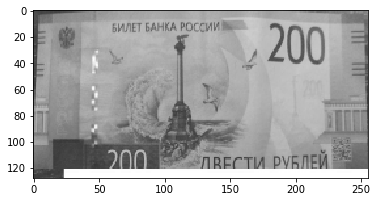

USA/5 0.9990422129631042
rubles/500 0.0488877147436142
USA/5 0.558502197265625
USA/1 0.8566482663154602


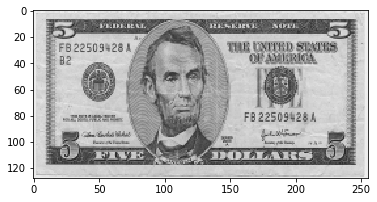

USA/100 1.0
rubles/500 0.0488877147436142
USA/100 1.0
USA/100 0.999138355255127


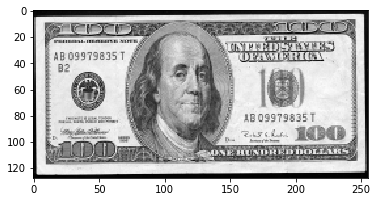

China/100 0.9992673993110657
rubles/500 0.0488877147436142
China/100 1.0
China/20 0.6305640339851379


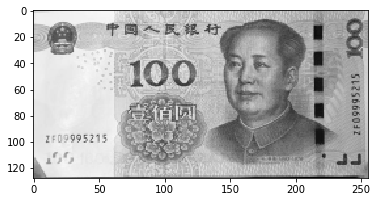

China/100 0.9987292885780334
rubles/500 0.0488877147436142
China/100 0.9603774547576904
China/100 0.9974271655082703


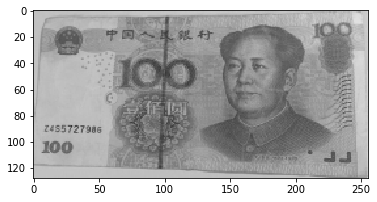

In [11]:
for i in range(11):
    print(f"{values[np.argmax(result[0][i])]} {result[0][i][np.argmax(result[0][i])]}")
    print(f"{values[np.argmax(result[1][i])]} {result[1][i][np.argmax(result[1][i])]}")
    print(f"{values[np.argmax(result[2][i])]} {result[2][i][np.argmax(result[2][i])]}")
    print(f"{values[np.argmax(result[3][i])]} {result[3][i][np.argmax(result[3][i])]}")
    plt.imshow(test_data[i])
    plt.show()